In [1]:
import sys
sys.path.append("../..") 

In [2]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

In [3]:
# args
RES_PATH1 = "../../experiments/simulations/measurement_error/"
RES_PATH2 = "../../experiments/simulations/data_size/"
RES_PATH3 = "../../experiments/simulations/nonstationary1/"
RES_PATH4 = "../../experiments/simulations/nonstationary/"

In [4]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathc = os.path.join(path, folder, "checkpoints/")
            paths = os.path.join(path, folder, "settings.csv")
            # model name:
            for _, _, files in os.walk(pathc):
                file = [f for f in files if f.endswith('.ckpt')][0]
                chk_path = os.path.join(pathc,file)
            checkpoint = torch.load(chk_path)
            model_name = checkpoint["hyper_parameters"]['net']
            hidden_dim_t = checkpoint["hyper_parameters"]['hidden_dims']
            # sim settings
            settings = pd.read_csv(paths)
            if (settings.N[0] == 10000):
                # model results:
                df = pd.read_csv(pathm)
                df_test = df.loc[:,df.columns.str.startswith('test') | df.columns.str.startswith('int')]
                df_test = df_test.dropna()
                df_test.loc[:,'model'] = model_name
                df_test.loc[:,'N'] = settings.N.item()
                df_test.loc[:,'sim_error'] = settings.sim_error.item()
                df_test.loc[:,'loss'] = settings.loss.item()
                df_test.loc[:,'stationary'] = settings.stationary.item()
                df_tests.append(df_test)
        df_test = pd.concat(df_tests, axis=0)
    return df_test

In [5]:
df1 = get_metrics_from_folder(RES_PATH1)
df2 = get_metrics_from_folder(RES_PATH2)
df3 = get_metrics_from_folder(RES_PATH3)

In [6]:
df = pd.concat((df1,df2,df3))
df.reset_index(inplace=True,drop=True)

In [7]:
d = {'neuralJumpModel':'NJ-ODE',
     'ctRNNModel':'ODE-SRN',
     'ctGRUModel':'ODE-GRU',
     'ctLSTMModel':'ODE-LSTM',
     'ODEGRUBayes':'ODE-GRU-Bayes',
     'resNeuralJumpModel':'rNJ-ODE',
     'IMODE':'IMODE'}

In [8]:
df['model_name'] = [d[m] for m in df.model]

In [9]:
df.loc[(df.N == 10000) & (df.sim_error == 1.0) & (df.model == 'IMODE'),'sim_error'] = 0.5

In [10]:
df.loc[df.model == 'ODEGRUBayes','model_name'] = df.loc[df.model == 'ODEGRUBayes','model_name'] + ' (' + df.loc[df.model == 'ODEGRUBayes','loss'] + ')'

In [11]:
df

,test_loss,test_loss_pred,test_loss_update,test_rmse,test_var_pit,test_crps,test_ignorance,test_int_score,int_coverage,int_med_width,int_av_width,model,N,sim_error,loss,stationary,model_name
0,-2.303887,-2.126961,-2.921207,4.113992,0.087108,0.016209,1.950034,0.136929,0.936925,13.539612,14.988475,ODEGRUBayes,10000,0.5,LL,1,ODE-GRU-Bayes (LL)
1,-2.007766,-1.840712,-2.674424,6.399196,0.084510,0.025843,1.673658,0.215218,0.947318,23.251305,24.691391,ctGRUModel,10000,1.0,LL,1,ODE-GRU
2,-2.398974,-2.243005,-2.759177,4.343426,0.077492,0.017280,2.087036,0.146698,0.947828,15.099258,16.810272,ctRNNModel,10000,0.5,LL,1,ODE-SRN
3,-2.022819,-1.847400,-2.765600,6.399698,0.082148,0.025851,1.671981,0.215582,0.953768,24.135101,25.347391,ctRNNModel,10000,1.0,LL,1,ODE-SRN
4,-2.439948,-2.290511,-2.714345,4.190239,0.083968,0.016460,2.141074,0.137826,0.948251,14.317032,15.872157,ODEGRUBayes,10000,0.5,LL,1,ODE-GRU-Bayes (LL)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-2.937256,-2.762584,-3.215351,2.937522,0.072378,0.010996,2.587912,0.098192,0.963519,10.338951,11.853385,ctLSTMModel,10000,NaN,LL,0,ODE-LSTM
64,-2.744061,-2.590620,-2.906436,3.246213,0.063996,0.012412,2.437180,0.114535,0.964214,12.071609,13.831040,ctGRUModel,10000,NaN,LL,0,ODE-GRU
65,-2.538244,-2.392193,-2.729632,3.806519,0.074197,0.014673,2.246142,0.137702,0.955615,13.998367,15.015114,neuralJumpModel,10000,NaN,LL,0,NJ-ODE
66,-2.797879,-2.653091,-2.846824,3.162557,0.068696,0.011765,2.508303,0.109728,0.966801,11.350693,12.924394,ctRNNModel,10000,NaN,LL,0,ODE-SRN


In [12]:
df['group'] = 'Standard'

In [13]:
df = df.loc[df.sim_error != 1.0,:]
df.reset_index(inplace=True,drop=True)

In [14]:
for i in range(df.shape[0]):
    if (df.stationary[i] == 1) & (df.sim_error[i] == 0.5):
        df.loc[:,'group'][i] = 'Measurement error'
    elif (df.stationary[i] == 0 & (df.sim_error[i] == 0.0)):
        df.loc[:,'group'][i] = 'Non-stationarity'
    elif (df.stationary[i] == 0 & (df.sim_error[i] == 0.5)):
        df.loc[:,'group'][i] = 'Non-stationarity + measurement error'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df.model_name.unique()

array(['ODE-GRU-Bayes (LL)', 'ODE-SRN', 'ODE-GRU-Bayes (KL)', 'ODE-LSTM',
       'NJ-ODE', 'IMODE', 'rNJ-ODE', 'ODE-GRU'], dtype=object)

In [16]:
df

,test_loss,test_loss_pred,test_loss_update,test_rmse,test_var_pit,test_crps,test_ignorance,test_int_score,int_coverage,int_med_width,int_av_width,model,N,sim_error,loss,stationary,model_name,group
0,-2.303887,-2.126961,-2.921207,4.113992,0.087108,0.016209,1.950034,0.136929,0.936925,13.539612,14.988475,ODEGRUBayes,10000,0.5,LL,1,ODE-GRU-Bayes (LL),Measurement error
1,-2.398974,-2.243005,-2.759177,4.343426,0.077492,0.017280,2.087036,0.146698,0.947828,15.099258,16.810272,ctRNNModel,10000,0.5,LL,1,ODE-SRN,Measurement error
2,-2.439948,-2.290511,-2.714345,4.190239,0.083968,0.016460,2.141074,0.137826,0.948251,14.317032,15.872157,ODEGRUBayes,10000,0.5,LL,1,ODE-GRU-Bayes (LL),Measurement error
3,-2.531491,-2.321151,-3.369153,4.319138,0.090477,0.016919,2.110810,0.144028,0.929398,13.428009,15.144845,ODEGRUBayes,10000,0.5,KL,1,ODE-GRU-Bayes (KL),Measurement error
4,-2.512156,-2.333257,-3.045068,4.101501,0.083756,0.016187,2.154358,0.135772,0.947428,13.956497,15.578367,ctLSTMModel,10000,0.5,LL,1,ODE-LSTM,Measurement error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-2.937256,-2.762584,-3.215351,2.937522,0.072378,0.010996,2.587912,0.098192,0.963519,10.338951,11.853385,ctLSTMModel,10000,NaN,LL,0,ODE-LSTM,Non-stationarity
62,-2.744061,-2.590620,-2.906436,3.246213,0.063996,0.012412,2.437180,0.114535,0.964214,12.071609,13.831040,ctGRUModel,10000,NaN,LL,0,ODE-GRU,Non-stationarity
63,-2.538244,-2.392193,-2.729632,3.806519,0.074197,0.014673,2.246142,0.137702,0.955615,13.998367,15.015114,neuralJumpModel,10000,NaN,LL,0,NJ-ODE,Non-stationarity
64,-2.797879,-2.653091,-2.846824,3.162557,0.068696,0.011765,2.508303,0.109728,0.966801,11.350693,12.924394,ctRNNModel,10000,NaN,LL,0,ODE-SRN,Non-stationarity


In [17]:
df.model_name.unique()

array(['ODE-GRU-Bayes (LL)', 'ODE-SRN', 'ODE-GRU-Bayes (KL)', 'ODE-LSTM',
       'NJ-ODE', 'IMODE', 'rNJ-ODE', 'ODE-GRU'], dtype=object)

In [18]:
hue_order = ['NJ-ODE', 'rNJ-ODE','ODE-SRN','ODE-GRU','ODE-GRU-Bayes (LL)','ODE-GRU-Bayes (KL)', 'ODE-LSTM','IMODE']

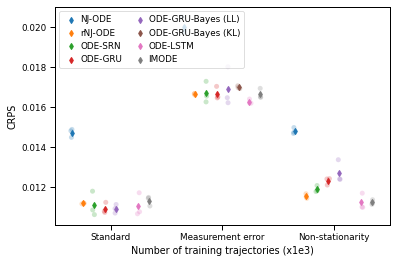

In [19]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="group", y="test_crps", hue="model_name",hue_order=hue_order,data=df,dodge=True,alpha=.25,zorder=1,order = ['Standard','Measurement error','Non-stationarity'])
sns.pointplot(x="group", y="test_crps", hue="model_name",hue_order=hue_order,data=df,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None,order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[8:], labels[8:], title="", handletextpad=0, columnspacing=1,
          loc="upper left", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('CRPS')
f.savefig('../../results/measurement_stationarity_crps1.png', dpi=300)
plt.show()

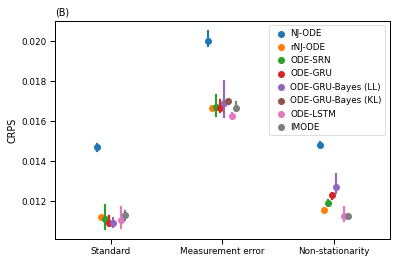

In [33]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="test_crps", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,alpha=.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('CRPS')
ax.set_title('(B)',loc='left')
f.savefig('../../results/measurement_stationarity_crps2.png', dpi=300)
plt.show()

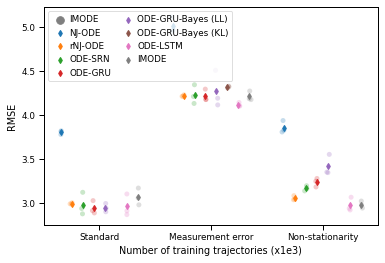

In [21]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="group", y="test_rmse", hue="model_name",hue_order=hue_order,data=df,dodge=True,alpha=.25,zorder=1,order = ['Standard','Measurement error','Non-stationarity'])
sns.pointplot(x="group", y="test_rmse", hue="model_name",hue_order=hue_order,data=df,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None,order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper left", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('RMSE')
f.savefig('../../results/measurement_stationarity_rmse1.png', dpi=300)
plt.show()

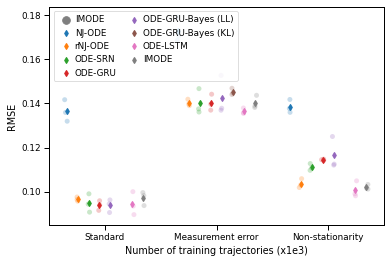

In [22]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="group", y="test_int_score", hue="model_name",hue_order=hue_order,data=df,dodge=True,alpha=.25,zorder=1,order = ['Standard','Measurement error','Non-stationarity'])
sns.pointplot(x="group", y="test_int_score", hue="model_name",hue_order=hue_order,data=df,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None,order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper left", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('RMSE')
f.savefig('../../results/measurement_stationarity_int_score1.png', dpi=300)
plt.show()

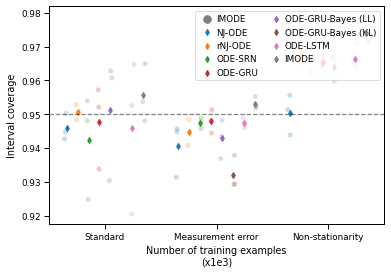

In [23]:
sns.set_context("paper")
f, ax = plt.subplots()
ax.axhline(0.95,ls='--',color="black",alpha=0.5)
sns.stripplot(x="group", y="int_coverage", hue="model_name",hue_order=hue_order,data=df,dodge=True,alpha=.25,zorder=1,order = ['Standard','Measurement error','Non-stationarity'])
sns.pointplot(x="group", y="int_coverage", hue="model_name",hue_order=hue_order,data=df,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None,order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training examples\n(x1e3)')
ax.set_ylabel('Interval coverage')
f.savefig('../../results/sim_measurement_error_int_coverage1.png', dpi=300)
plt.show()

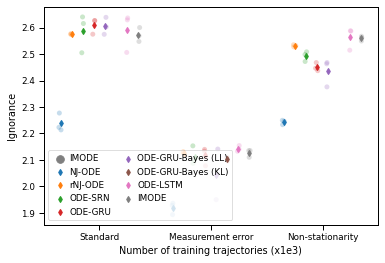

In [24]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="group", y="test_ignorance", hue="model_name",hue_order=hue_order,data=df,dodge=True,alpha=.25,zorder=1,order = ['Standard','Measurement error','Non-stationarity'])
sns.pointplot(x="group", y="test_ignorance", hue="model_name",hue_order=hue_order,data=df,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None,order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="lower left", ncol=2, frameon=True)
ax.set_xlabel('Number of training trajectories (x1e3)')
ax.set_ylabel('Ignorance')
f.savefig('../../results/measurement_stationarity_ignorance1.png', dpi=300)
plt.show()

In [25]:
def get_val_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathc = os.path.join(path, folder, "checkpoints/")
            paths = os.path.join(path, folder, "settings.csv")
            # model name:
            for _, _, files in os.walk(pathc):
                file = [f for f in files if f.endswith('.ckpt')][0]
                chk_path = os.path.join(pathc,file)
            checkpoint = torch.load(chk_path)
            model_name = checkpoint["hyper_parameters"]['net']
            hidden_dim_t = checkpoint["hyper_parameters"]['hidden_dims']
            # sim settings
            settings = pd.read_csv(paths)
            # model results:
            df = pd.read_csv(pathm)
            df_test = df.loc[:,df.columns.str.startswith('val') | df.columns.str.startswith('epoch')]
            df_test = df_test.dropna()
            df_test.loc[:,'version'] = folder
            df_test.loc[:,'model'] = model_name
            df_test.loc[:,'N'] = settings.N.item()
            df_tests.append(df_test)
        df_test = pd.concat(df_tests, axis=0)
    return df_test

In [26]:
df_val = get_val_from_folder(RES_PATH1)

In [27]:
model_N = df_val.loc[:,['model','N']].drop_duplicates().copy()
model_N = model_N.sort_values(['model','N'])
model_N.reset_index(inplace=True,drop=True)
model_N

,model,N
0,IMODE,10000
1,ODEGRUBayes,10000
2,ctGRUModel,10000
3,ctLSTMModel,10000
4,ctRNNModel,10000
5,neuralJumpModel,10000
6,resNeuralJumpModel,10000


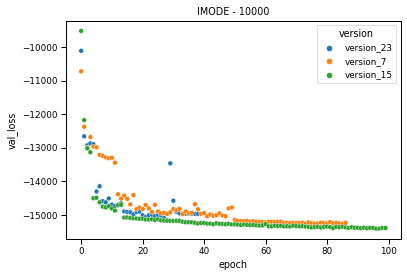

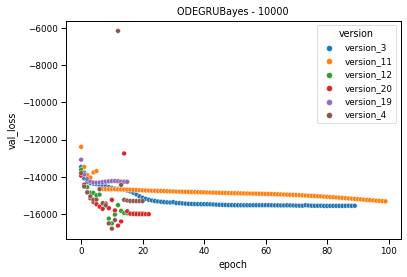

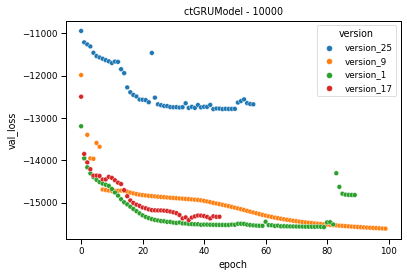

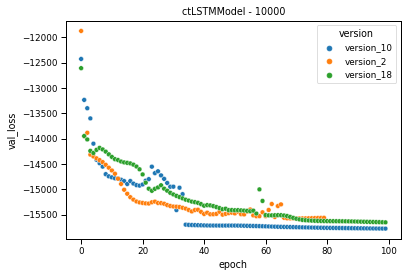

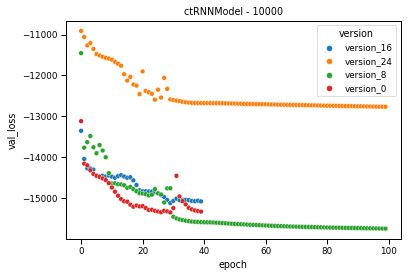

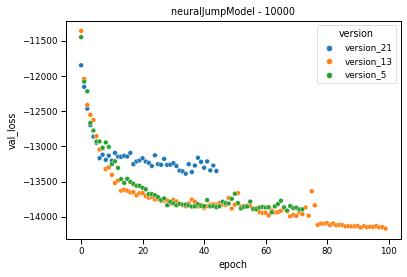

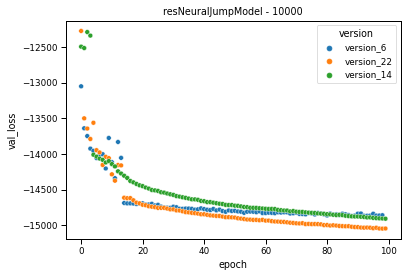

In [28]:
for i in range(model_N.shape[0]):
    df_plot = df_val.loc[(df_val.model == model_N.model[i]) & (df_val.N == model_N.N[i]),:]
    sns.scatterplot(x='epoch',y='val_loss',hue="version",data=df_plot)
    plt.title(model_N.model[i] + " - " + str(model_N.N[i]))
    plt.show()

In [29]:
df_val = get_val_from_folder(RES_PATH3)

In [30]:
model_N = df_val.loc[:,['model','N']].drop_duplicates().copy()
model_N = model_N.sort_values(['model','N'])
model_N.reset_index(inplace=True,drop=True)
model_N

,model,N
0,IMODE,10000
1,ODEGRUBayes,10000
2,ctGRUModel,10000
3,ctLSTMModel,10000
4,ctRNNModel,10000
5,neuralJumpModel,10000
6,resNeuralJumpModel,10000


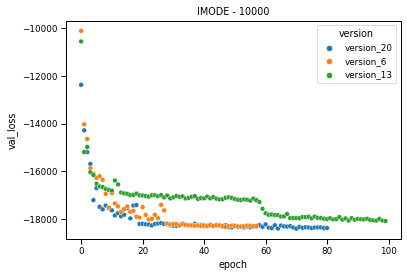

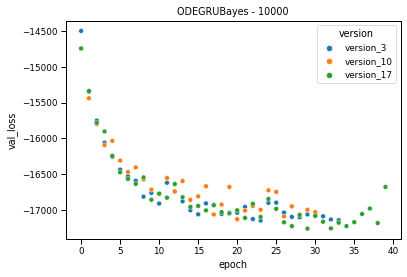

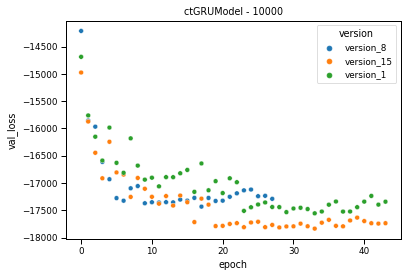

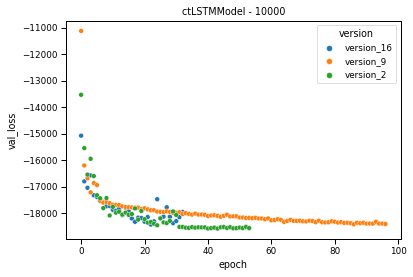

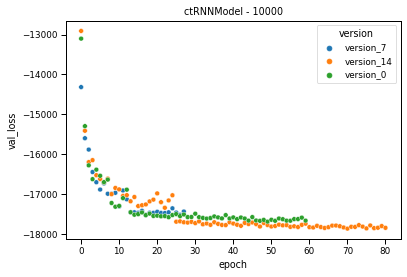

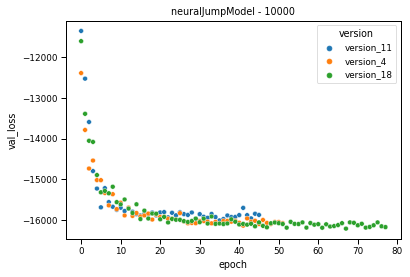

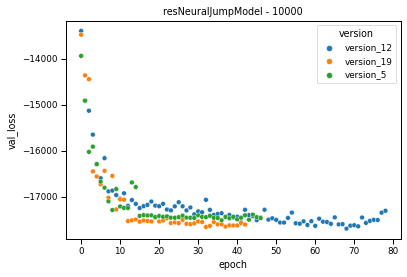

In [31]:
for i in range(model_N.shape[0]):
    df_plot = df_val.loc[(df_val.model == model_N.model[i]) & (df_val.N == model_N.N[i]),:]
    sns.scatterplot(x='epoch',y='val_loss',hue="version",data=df_plot)
    plt.title(model_N.model[i] + " - " + str(model_N.N[i]))
    plt.show()